In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./DATA/default_of_credit_card_clients.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DPNM
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.columns.to_list()

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'DPNM']

In [4]:
df.rename(columns={'ID':'id', 'LIMIT_BAL':'bal',
                    'SEX':'gen', 'EDUCATION':'edu',
                    'MARRIAGE':'mary', 'AGE':'age',
                    'PAY_1':'p1', 'PAY_2':'p2',
                    'PAY_3':'p3','PAY_4':'p4',
                    'PAY_5':'p5','PAY_6':'p6',
                    'BILL_AMT1':'$b1', 'BILL_AMT2':'$b2',
                    'BILL_AMT3':'$b3', 'BILL_AMT4':'$b4',
                    'BILL_AMT5':'$b5', 'BILL_AMT6':'$b6',
                    'PAY_AMT1':'$p1','PAY_AMT2':'$p2',
                    'PAY_AMT3':'$p3', 'PAY_AMT4':'$p4',
                    'PAY_AMT5':'$p5', 'PAY_AMT6':'$p6'}, inplace=True)

In [5]:
df.columns

Index(['id', 'bal', 'gen', 'edu', 'mary', 'age', 'p1', 'p2', 'p3', 'p4', 'p5',
       'p6', '$b1', '$b2', '$b3', '$b4', '$b5', '$b6', '$p1', '$p2', '$p3',
       '$p4', '$p5', '$p6', 'DPNM'],
      dtype='object')

In [6]:
payst1 = [ 'p1', 'p2', 'p3', 'p4', 'p5', 'p6' ]
billsd1 = [ '$b1', '$b2', '$b3', '$b4', '$b5', '$b6' ]
paysd1 = [ '$p1', '$p2', '$p3', '$p4', '$p5', '$p6' ]

In [7]:
df.columns

Index(['id', 'bal', 'gen', 'edu', 'mary', 'age', 'p1', 'p2', 'p3', 'p4', 'p5',
       'p6', '$b1', '$b2', '$b3', '$b4', '$b5', '$b6', '$p1', '$p2', '$p3',
       '$p4', '$p5', '$p6', 'DPNM'],
      dtype='object')

In [8]:
hb_cols1 = ['hb1', 'hb1', 'hb3', 'hb4', 'hb5', 'hb6']

j=0
for c in payst1:
    datat1 = df[c].values
    datapd1 = df[paysd1[j]]
    databd1 = df[billsd1[j]]
    v_col = []
    k = 0
    for val1 in datat1:
        if (val1<=0 and (datapd1[k]>=0.7*databd1[k])) :
        #if val1<=0:
            v_col.append(1)
        else:
            v_col.append(0)
        k += 1
    df[hb_cols1[j]] = v_col
    print(df[hb_cols1[j]].value_counts()/30000)
    j += 1

hb1
0    0.821133
1    0.178867
Name: count, dtype: float64
hb1
0    0.7531
1    0.2469
Name: count, dtype: float64
hb3
0    0.751033
1    0.248967
Name: count, dtype: float64
hb4
0    0.7456
1    0.2544
Name: count, dtype: float64
hb5
0    0.721867
1    0.278133
Name: count, dtype: float64
hb6
0    0.700667
1    0.299333
Name: count, dtype: float64


In [9]:
df.columns

Index(['id', 'bal', 'gen', 'edu', 'mary', 'age', 'p1', 'p2', 'p3', 'p4', 'p5',
       'p6', '$b1', '$b2', '$b3', '$b4', '$b5', '$b6', '$p1', '$p2', '$p3',
       '$p4', '$p5', '$p6', 'DPNM', 'hb1', 'hb3', 'hb4', 'hb5', 'hb6'],
      dtype='object')

In [10]:
df.bal.max(), df.bal.min(), df.bal.std()

(1000000, 10000, 129747.66156719506)

In [11]:
df25K = df[ df['bal']<=25000 ]
df100K = df[ (df['bal']>25000) & (df['bal']<=100000) ]
df500K = df[ (df['bal']>100000) & (df['bal']<=500000) ]
df1M = df[ (df['bal']>500000) ]
df25K.shape, df100K.shape, df500K.shape, df1M.shape 

((2471, 30), (10027, 30), (17296, 30), (206, 30))

In [12]:
df25K.shape[0]+df100K.shape[0]+df500K.shape[0]+df1M.shape[0]

30000

In [13]:
n_25K = df25K.shape[0]
n_100K = df100K.shape[0]
n_500K = df500K.shape[0]
n_1M = df1M.shape[0]
n_25K, n_100K, n_500K, n_1M

(2471, 10027, 17296, 206)

In [14]:
index1 = ['n_25K', 'n_100K', 'n_500K', 'n_1M']
val1 = [n_25K, n_100K, n_500K, n_1M]
index1, val1

(['n_25K', 'n_100K', 'n_500K', 'n_1M'], [2471, 10027, 17296, 206])

In [15]:
df_view = pd.DataFrame({'x':val1})
df_view

,x
0,2471
1,10027
2,17296
3,206


In [16]:
df_view.index = index1

In [208]:
df_view

,x
n_25K,2471
n_100K,10027
n_500K,17296
n_1M,206


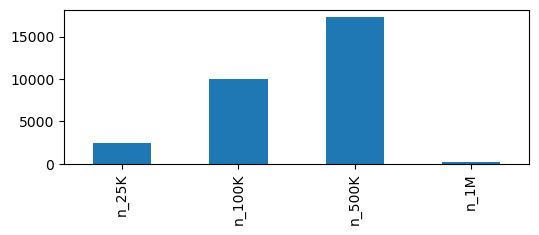

In [17]:
plt.figure(figsize=(6,2))
df_view['x'].plot(kind='bar')
plt.show()

In [18]:
dfcs = (df25K, df100K, df500K, df1M)

In [19]:
k = 0
data_v1 = []
for i_dfs in dfcs:
    print('class_ :', k+1)
    d_v1 = []
    for c1 in hb_cols1:
        print(i_dfs[c1].value_counts()/i_dfs.shape[0])
        #print(i_dfs[c1].value_counts().values[0]/i_dfs.shape[0])
        d_v1.append(i_dfs[c1].value_counts().values[1]/i_dfs.shape[0])
        j += 1
    data_v1.append(d_v1)
    k += 1

class_ : 1
hb1
0    0.882234
1    0.117766
Name: count, dtype: float64
hb1
0    0.882234
1    0.117766
Name: count, dtype: float64
hb3
0    0.862809
1    0.137191
Name: count, dtype: float64
hb4
0    0.860785
1    0.139215
Name: count, dtype: float64
hb5
0    0.824767
1    0.175233
Name: count, dtype: float64
hb6
0    0.757183
1    0.242817
Name: count, dtype: float64
class_ : 2
hb1
0    0.868056
1    0.131944
Name: count, dtype: float64
hb1
0    0.868056
1    0.131944
Name: count, dtype: float64
hb3
0    0.857385
1    0.142615
Name: count, dtype: float64
hb4
0    0.842027
1    0.157973
Name: count, dtype: float64
hb5
0    0.816396
1    0.183604
Name: count, dtype: float64
hb6
0    0.800937
1    0.199063
Name: count, dtype: float64
class_ : 3
hb1
0    0.668247
1    0.331753
Name: count, dtype: float64
hb1
0    0.668247
1    0.331753
Name: count, dtype: float64
hb3
0    0.673624
1    0.326376
Name: count, dtype: float64
hb4
0    0.673046
1    0.326954
Name: count, dtype: float64
hb5
0  

In [20]:
months = ['APR', 'MAY', 'JUN', 'JULY', 'AUG', 'SEPT']

In [21]:
data_v1 = np.array(data_v1)
data_v1.shape

(4, 6)

In [22]:
df_1 = pd.DataFrame({'c_1': data_v1[0,:]})
df_1.index = months
df_1['c_2'] = data_v1[1,:]
df_1['c_3'] = data_v1[2,:]
df_1['c_4'] = data_v1[3,:]
df_1

,c_1,c_2,c_3,c_4
APR,0.117766,0.131944,0.331753,0.266990
MAY,0.117766,0.131944,0.331753,0.266990
JUN,0.137191,0.142615,0.326376,0.266990
JULY,0.139215,0.157973,0.326954,0.237864
AUG,0.175233,0.183604,0.347479,0.291262
SEPT,0.242817,0.199063,0.365807,0.276699


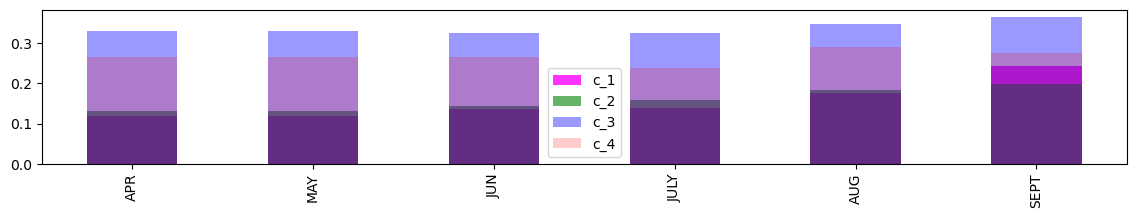

In [24]:
plt.figure(figsize=(14,2))
df_1.c_1.plot(kind='bar', alpha=0.8, color='magenta')
df_1.c_2.plot(kind='bar', alpha=0.6, color='green')
df_1.c_3.plot(kind='bar', alpha=0.4, color='blue')
df_1.c_4.plot(kind='bar', alpha=0.2, color='red')
plt.legend()
plt.show()